In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0317).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*18.0/28.8
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])
data['k_oh_no2'] = 3.0*10**(-11)
data['k_oh_oh'] = 6.2*10**(-14)*(data['tas']/298)**2.6*np.exp(945/data['tas'])+3.9*10**(-11)*(data['tas']/300)**(-0.47)
data['k_oh_ho2'] = 4.8*10**(-11)*np.exp(250/data['tas'])
data['k_oh_no'] = 3.3*10**(-11)*(data['tas']/300)**(-0.3)
data['jo1d'] = data['photo1d']*10

In [47]:
data['o1d_mole'] = (data['lossco_mole']+
                    data['k_o3_oh']*data['o3_mole']*data['oh_mole']+
                    data['k_oh_no2']*data['no2_mole']*data['oh_mole']+
                    2*data['k_oh_oh']*data['oh_mole']**2+
                    data['k_oh_ho2']*data['ho2_mole']*data['oh_mole']+
                    data['k_oh_no']*data['no_mole']*data['oh_mole']-
                    data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']-
                    data['k_no_ho2']*data['no_mole']*data['ho2_mole']
                   )/(2*data['k_o1d_h2o']*data['h2o_mole'])
data['o1d_mole'].describe()

count    9.720000e+05
mean     2.406214e+07
std      1.233918e+08
min      2.766249e-01
25%      5.247732e+05
50%      2.485508e+06
75%      5.392653e+06
max      6.429642e+09
Name: o1d_mole, dtype: float64

In [49]:
data['P4'] = data['k_o1d_h2o']*data['o1d_mole']*data['h2o_mole']
data['P4_frac'] = data['P4']/data['o3loss_mole']
data['P4_frac'].describe()

count    972000.000000
mean          0.607026
std           8.142371
min          -0.085005
25%          -0.008564
50%           0.021824
75%           0.073540
max        1766.472689
Name: P4_frac, dtype: float64

In [50]:
data['alpha'] = data['o1d_mole']/data['o3_mole']/(data['jo1d'])
data['alpha'].describe()

count    9.720000e+05
mean              NaN
std               NaN
min              -inf
25%     -7.408348e-03
50%      1.129461e-02
75%      3.154022e-02
max               inf
Name: alpha, dtype: float64

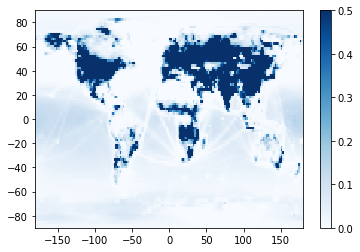

In [51]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P4_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [52]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [53]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [54]:
data['P7'] = data['o3loss_mole'] - data['P4'] - data['P5'] - data['P6']
data['P7_frac'] = data['P7']/data['o3loss_mole']
data['P7_frac'].describe()

count    972000.000000
mean         -0.086949
std           8.123206
min       -1765.656861
25%           0.302904
50%           0.457298
75%           0.585599
max           0.998655
Name: P7_frac, dtype: float64

In [55]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.632995
std           2.033382
min           0.002828
25%           0.531764
50%           1.068481
75%           2.142160
max         134.400362
Name: ratio_P1_P2, dtype: float64

In [56]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          2.574864
std          15.660226
min           0.008336
25%           0.158606
50%           0.265355
75%           0.661963
max        1340.643521
Name: ratio_P5_P6, dtype: float64

In [57]:
data = data.rename(columns={'country_x':'country'})
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_oh,k_oh_ho2,k_oh_no,jo1d,o1d_mole,P4,P4_frac,alpha,P7,P7_frac
0,1.0,-89.0,1.0,911.0,1.589701e-08,8.802798e-14,9.406584e-14,0.000000e+00,0.000000e+00,249.57623,...,4.424738e-11,1.306993e-10,3.487300e-11,0.000088,856855.525931,1965.753774,0.034702,0.020907,7152.146352,0.126259
1,3.0,-89.0,1.0,2911.0,1.590375e-08,8.794498e-14,9.389479e-14,0.000000e+00,0.000000e+00,249.54080,...,4.425051e-11,1.307179e-10,3.487449e-11,0.000088,851494.357142,1945.243184,0.034403,0.020759,7123.628101,0.125985
2,5.0,-89.0,1.0,4911.0,1.591221e-08,8.791484e-14,9.379763e-14,0.000000e+00,0.000000e+00,249.50958,...,4.425326e-11,1.307342e-10,3.487580e-11,0.000088,848648.092166,1930.208388,0.034172,0.020671,7108.405774,0.125846
3,7.0,-89.0,1.0,6911.0,1.594265e-08,8.803169e-14,9.397011e-14,0.000000e+00,0.000000e+00,249.49193,...,4.425482e-11,1.307435e-10,3.487654e-11,0.000088,849158.815890,1922.847601,0.033979,0.020641,7089.018156,0.125272
4,9.0,-89.0,1.0,8911.0,1.596177e-08,8.795628e-14,9.384050e-14,0.000000e+00,0.000000e+00,249.46387,...,4.425730e-11,1.307582e-10,3.487771e-11,0.000088,840913.058725,1897.403875,0.033576,0.020417,7043.017520,0.124631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,1.630996e-08,2.842892e-16,1.809345e-16,3.336417e-13,6.572778e-15,242.57967,...,4.488139e-11,1.345304e-10,3.517175e-11,0.000000,-436.166409,-0.876081,-0.008040,-inf,71.492389,0.656142
971996,-7.0,89.0,60.0,-6911.0,1.632853e-08,2.287422e-16,1.680337e-16,1.499039e-13,2.951658e-15,242.59355,...,4.488010e-11,1.345225e-10,3.517115e-11,0.000000,-481.675898,-0.964609,-0.009533,-inf,56.619127,0.559533
971997,-5.0,89.0,60.0,-4911.0,1.634956e-08,1.920444e-16,1.595247e-16,1.640803e-14,3.207111e-16,242.60947,...,4.487862e-11,1.345134e-10,3.517046e-11,0.000000,-509.046584,-1.016046,-0.010577,-inf,43.352161,0.451276
971998,-3.0,89.0,60.0,-2911.0,1.636259e-08,2.303925e-16,1.698968e-16,3.794615e-14,7.451860e-16,242.61600,...,4.487801e-11,1.345096e-10,3.517017e-11,0.000000,-513.065263,-1.020638,-0.009976,-inf,52.233649,0.510534


In [58]:
list(data)

['longitude',
 'latitude',
 't',
 'loc',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'k_no_ho2',
 'k_no_ch3o2',
 'k_o1d_h2o',
 'k_o3_ho2',
 'k_o3_oh',
 'K1_NO_HO2',
 'K1_NO_CH3O2',
 'K1_O1D_H2O',
 'K1_O3_OH',
 'K1_O3_HO2',
 'K2_NO_HO2',
 'K2_NO_CH3O2',
 'K2_O1D_H2O',
 'K2_O3_OH',
 'K2_O3_HO2',
 'country',
 'o3_mole',
 'no_mole',
 'no2_mole',
 'oh_mole',
 'h2o_mole',
 'hno3_mole',
 'pan_mole',
 'k_ho2_ho2',
 'k_oh_no2',
 'o3prod_mole',
 'o3loss_mole',
 'lossch4_mole',
 'lossco_mole',
 'k_ch3o2_ch3o2',
 'ho2_mole',
 'ratio_ho2_oh',
 'P1',
 'P1_frac',
 'ch3o2_mole',
 'ratio_ch3o2_oh',
 'P2',
 'P2_frac',
 'P3',
 'P3_frac',
 'P5',
 'P5_frac',
 'P6',
 'P6_frac',
 'ratio_P1_P2',
 'ratio_P5_P6',
 'country_y',
 'k_oh_oh',
 'k_oh_ho2',
 'k_oh_no',
 'jo1d',
 'o1d_mole',
 'P4',
 'P4_frac',
 'alpha',
 'P7',
 'P7_frac']

In [59]:
#data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0318).csv', index = False)

In [60]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P4_frac = data_land['P4_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
P7_frac = data_land['P7_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [61]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P4 fraction:    "+str(np.round(P4_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P7 fraction:    "+str(np.round(P7_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.33
P2 fraction:    0.24
P3 fraction:    0.43
P4 fraction:    1.72
P5 fraction:    0.13
P6 fraction:    0.3
P7 fraction:    -1.15
P1:P2 ratio:    2.13
P5:P6 ratio:    0.84
HO₂:OH ratio:   40.0
CH₃O₂:OH ratio: 16.9
